In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
df_patient = pd.read_csv("data/data_driven_patients.csv")
df_msf = pd.read_csv("data/clean_all_preprocessed.csv")

In [7]:
base_features = [x for x in df_patient.columns if 'base' in x]
symptoms = [x for x in df_patient.columns if 'symp' in x]
symptoms.remove('symptom_temp')
diseases = [x for x in df_patient.columns if 'disease' in x]

In [53]:
# df_msf['base_country'].value_counts()
df_patient[(df_patient.values == 'False').all(axis=1)]

,base_country,disease_cough_pneumonia,disease_ear_acute_infection,disease_abdo_gastro,disease_skin_scabies_simple,disease_skin_tinea_capitis,disease_malnut_mam,disease_abdo_unclassified,disease_malaria_severe,disease_skin_eczema_simple,...,symptom_earpain,symptom_eyepb,symptom_throat,symptom_mouthpb,symptom_dysuria,symptom_hematuria,symptom_joint,symptom_limp,symptom_measles,symptom_drepano


## MSF Data Plots

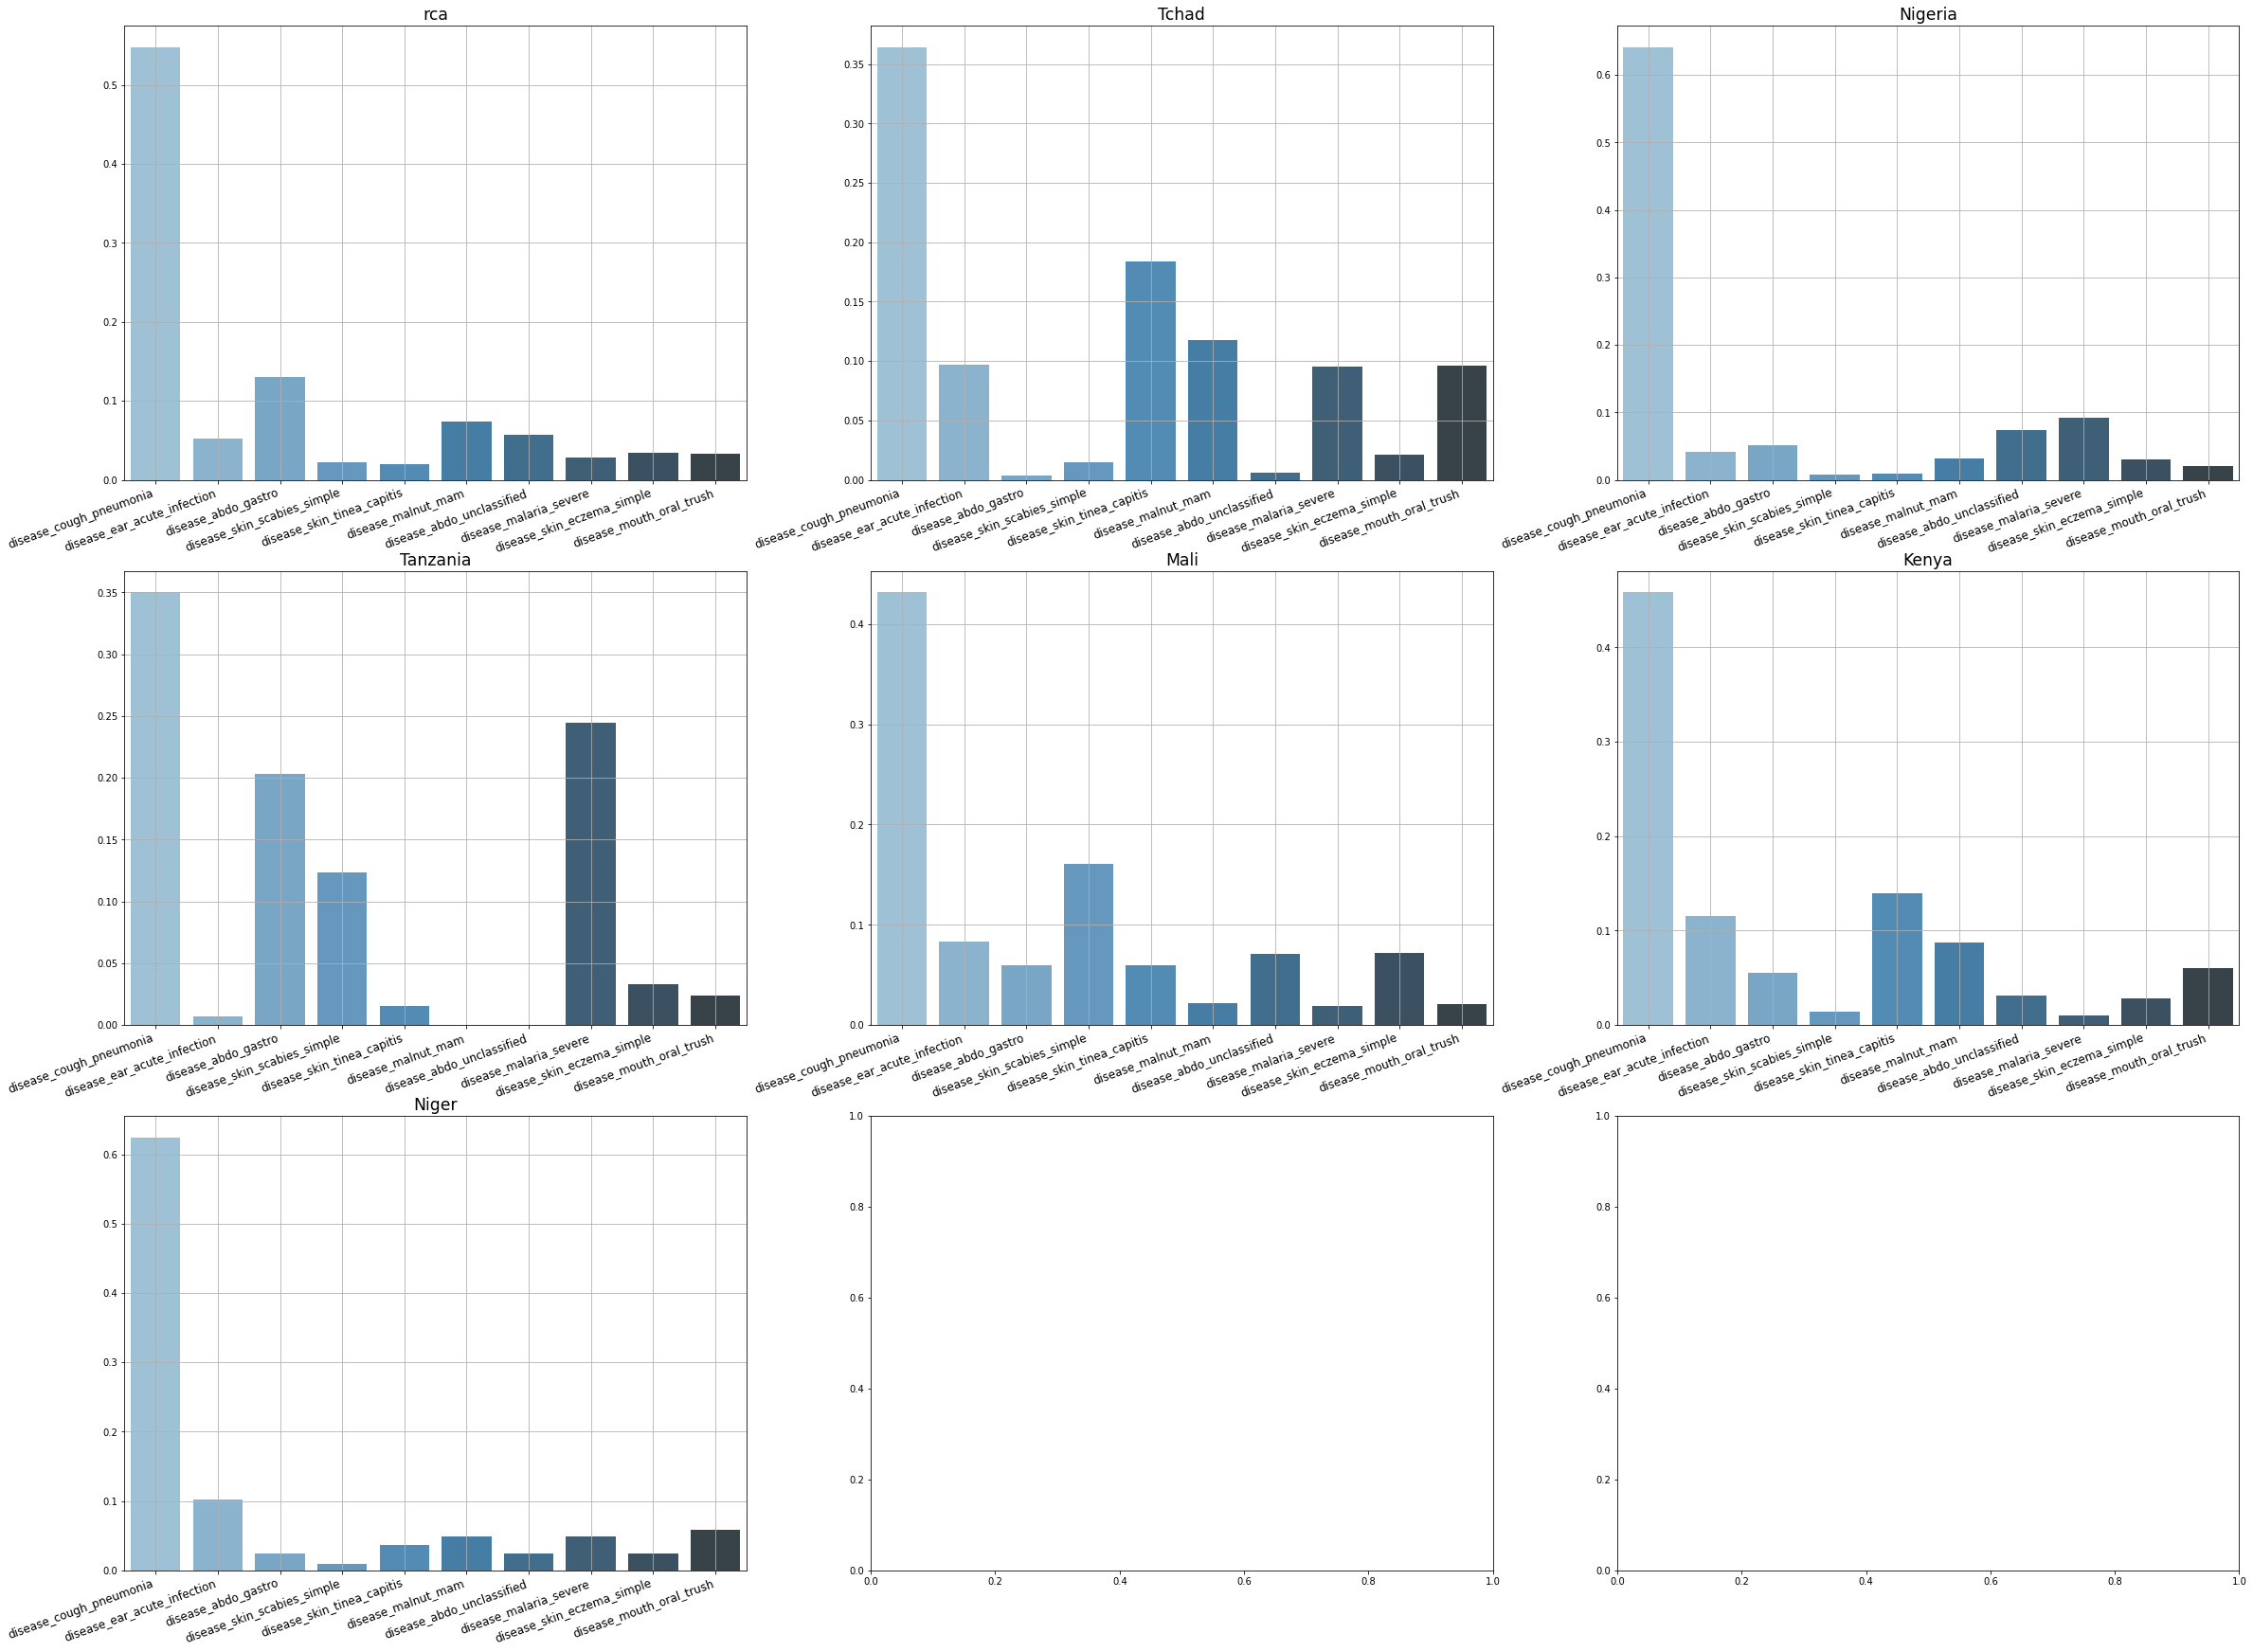

In [40]:
# diseases by country
countries = df_patient['base_country'].unique()
n_subplots = len(countries)
n_cols = 3
n_rows = int(np.ceil(n_subplots / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(40, 30))
i = j = 0
for k, country in enumerate(countries):
    _df = df_msf[df_msf['base_country'] == country]
    a = _df[diseases].sum()
#     axs[i][j].bar([x for x in range(len(a))], a, tick_label=symptoms)
    sns.barplot([x for x in range(len(a))], a / sum(a), ax=axs[i][j], palette="Blues_d")
#     plt.setp(axs[i][j].get_xticklabels(), rotation=-30, horizontalalignment='right')
    axs[i][j].set_xticklabels(diseases, rotation=20, ha="right", fontsize='large')
    axs[i][j].set_title(f"{country}", fontsize='xx-large')
    axs[i][j].grid()

    if k != 0 and (k + 1) % n_cols == 0:
        i += 1
    j = (j + 1) % (n_cols)
    
plt.savefig("figures/pdf_msf_diseases_by_country.pdf")



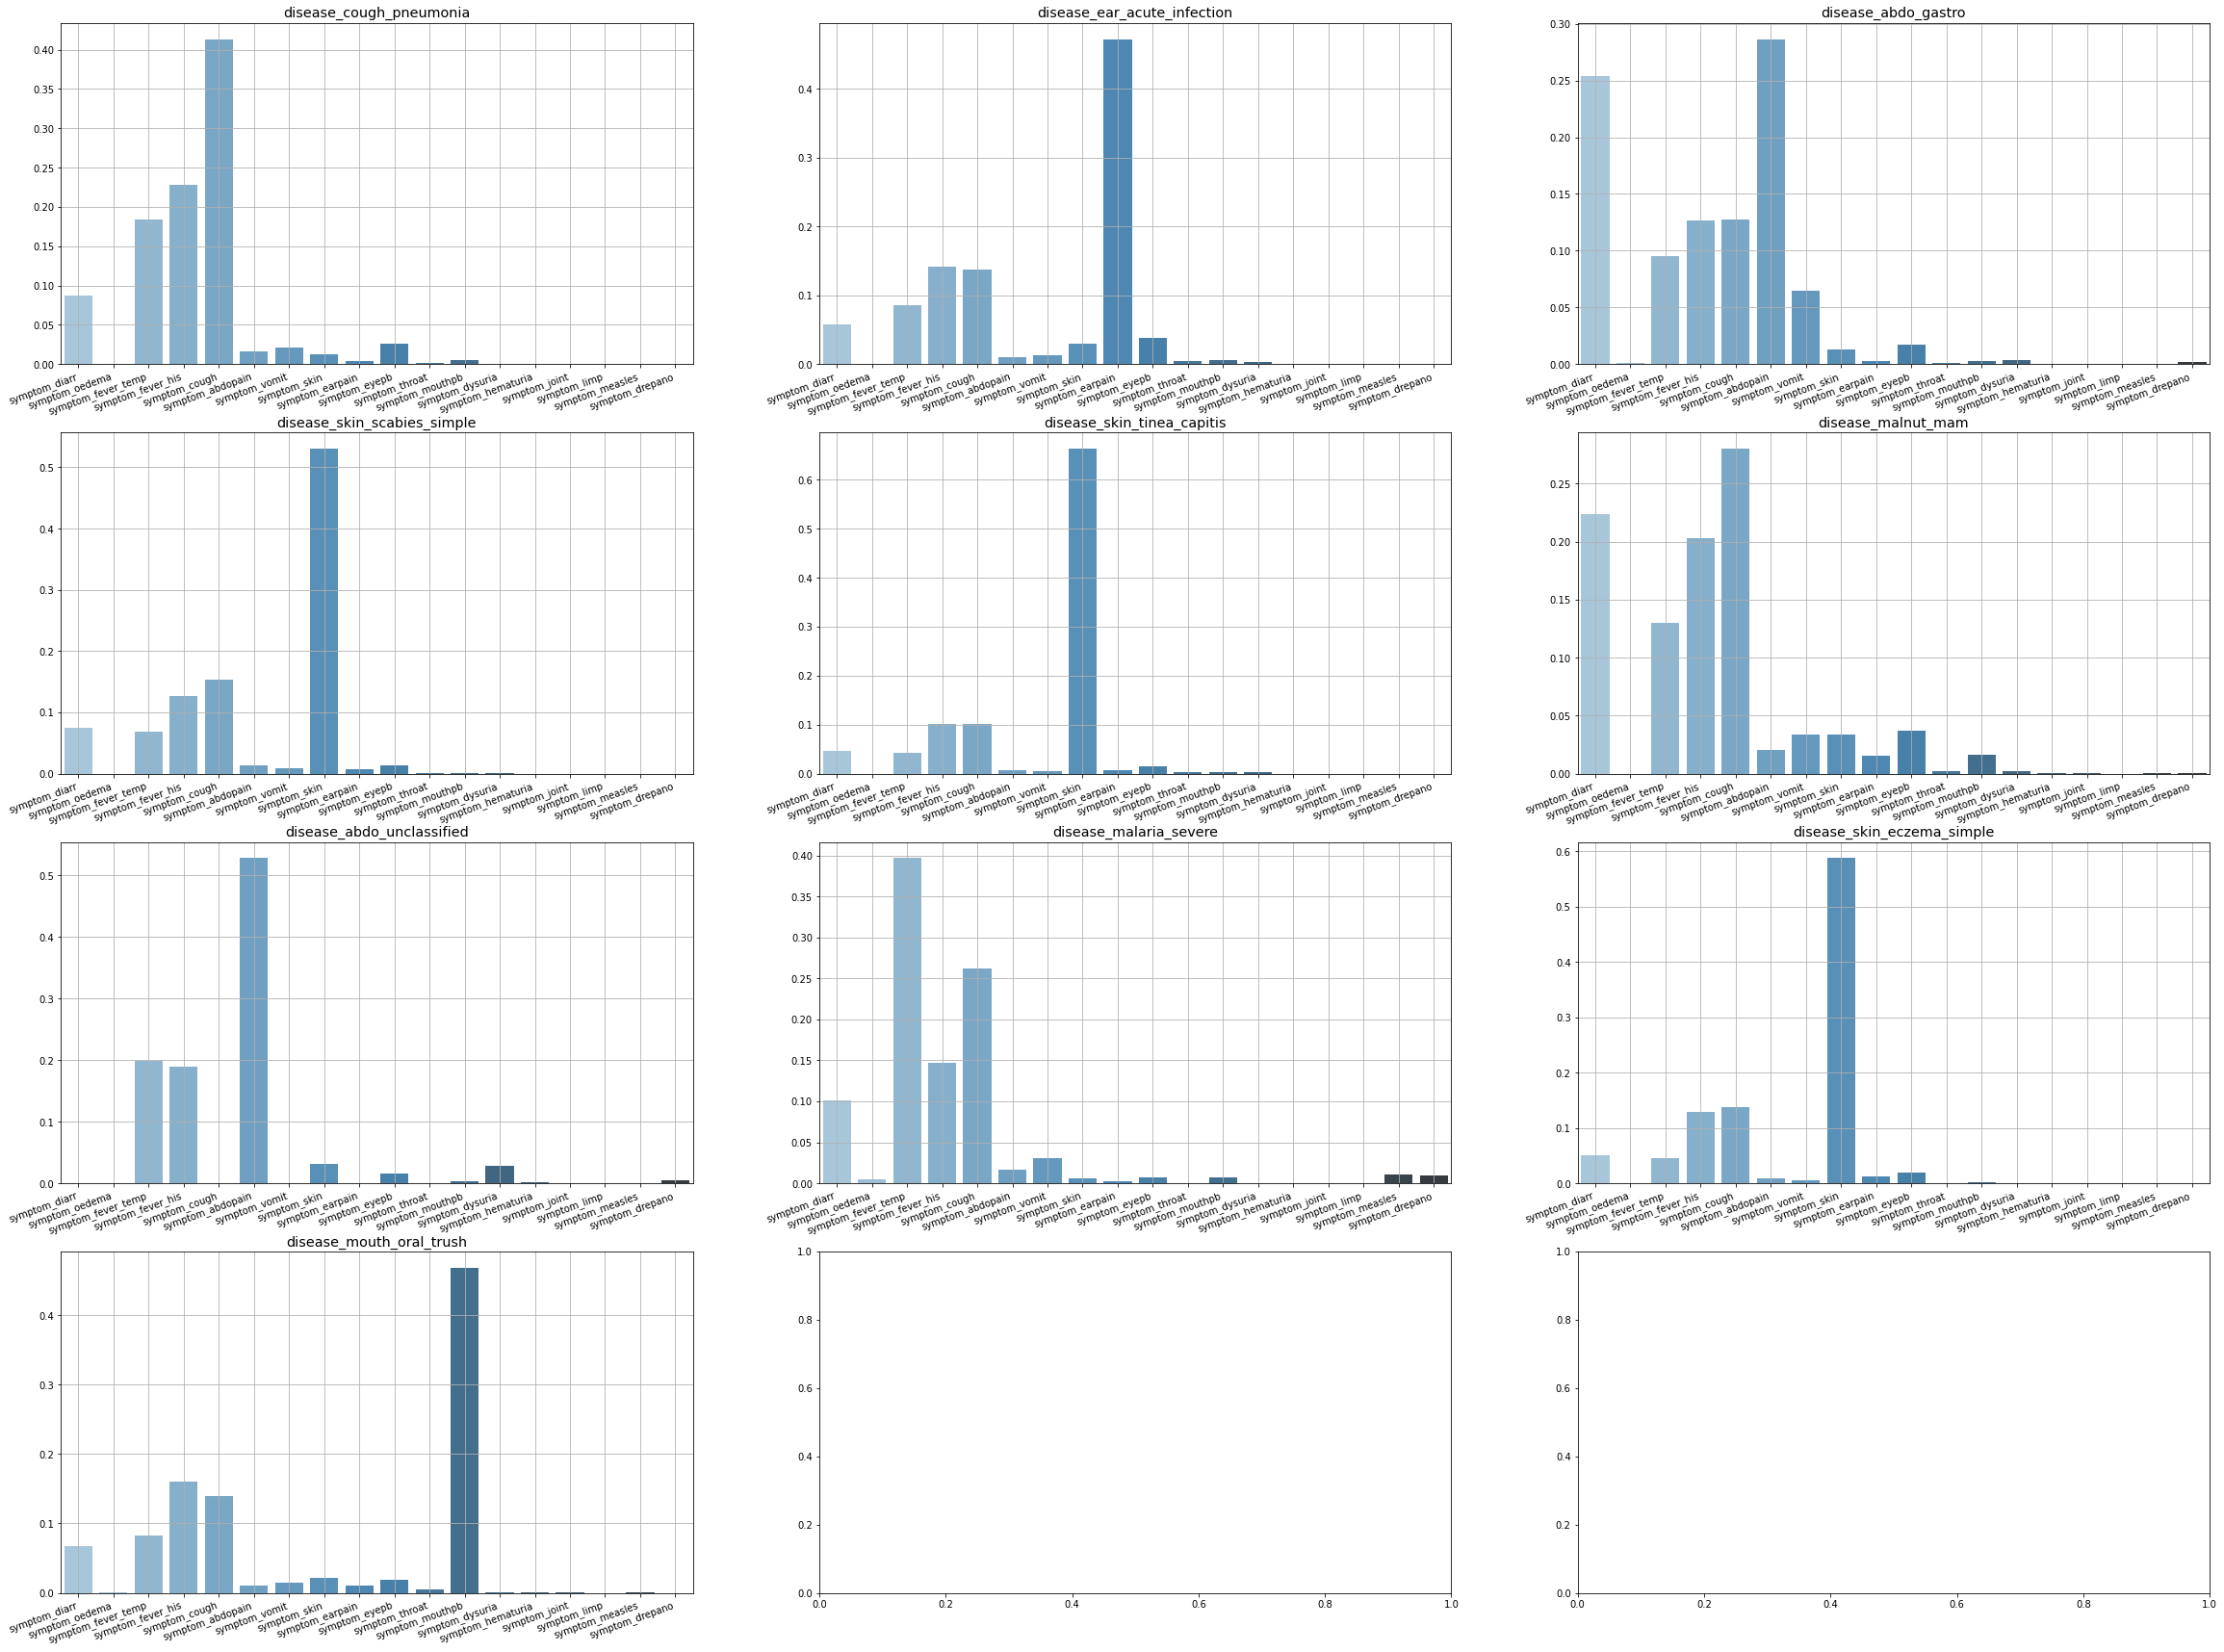

In [43]:
# symptom distribution per disease
n_subplots = len(diseases)
n_cols = 3
n_rows = int(np.ceil(n_subplots / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(40, 30))
i = j = 0
for k, disease in enumerate(diseases):
    _df = df_msf[df_msf[disease] == 1]
    a = _df[symptoms].sum()
#     axs[i][j].bar([x for x in range(len(a))], a, tick_label=symptoms)
    sns.barplot([x for x in range(len(a))], a/sum(a), ax=axs[i][j], palette="Blues_d")
#     plt.setp(axs[i][j].get_xticklabels(), rotation=-30, horizontalalignment='right')
    axs[i][j].set_xticklabels(symptoms, rotation=20, ha="right")
    axs[i][j].set_title(f"{disease}", fontsize='x-large')
    axs[i][j].grid()

    if k != 0 and (k + 1) % n_cols == 0:
        i += 1
    j = (j + 1) % (n_cols)
    
plt.savefig("figures/pdf_msf_symptoms_by_disease.pdf")


## Model V3

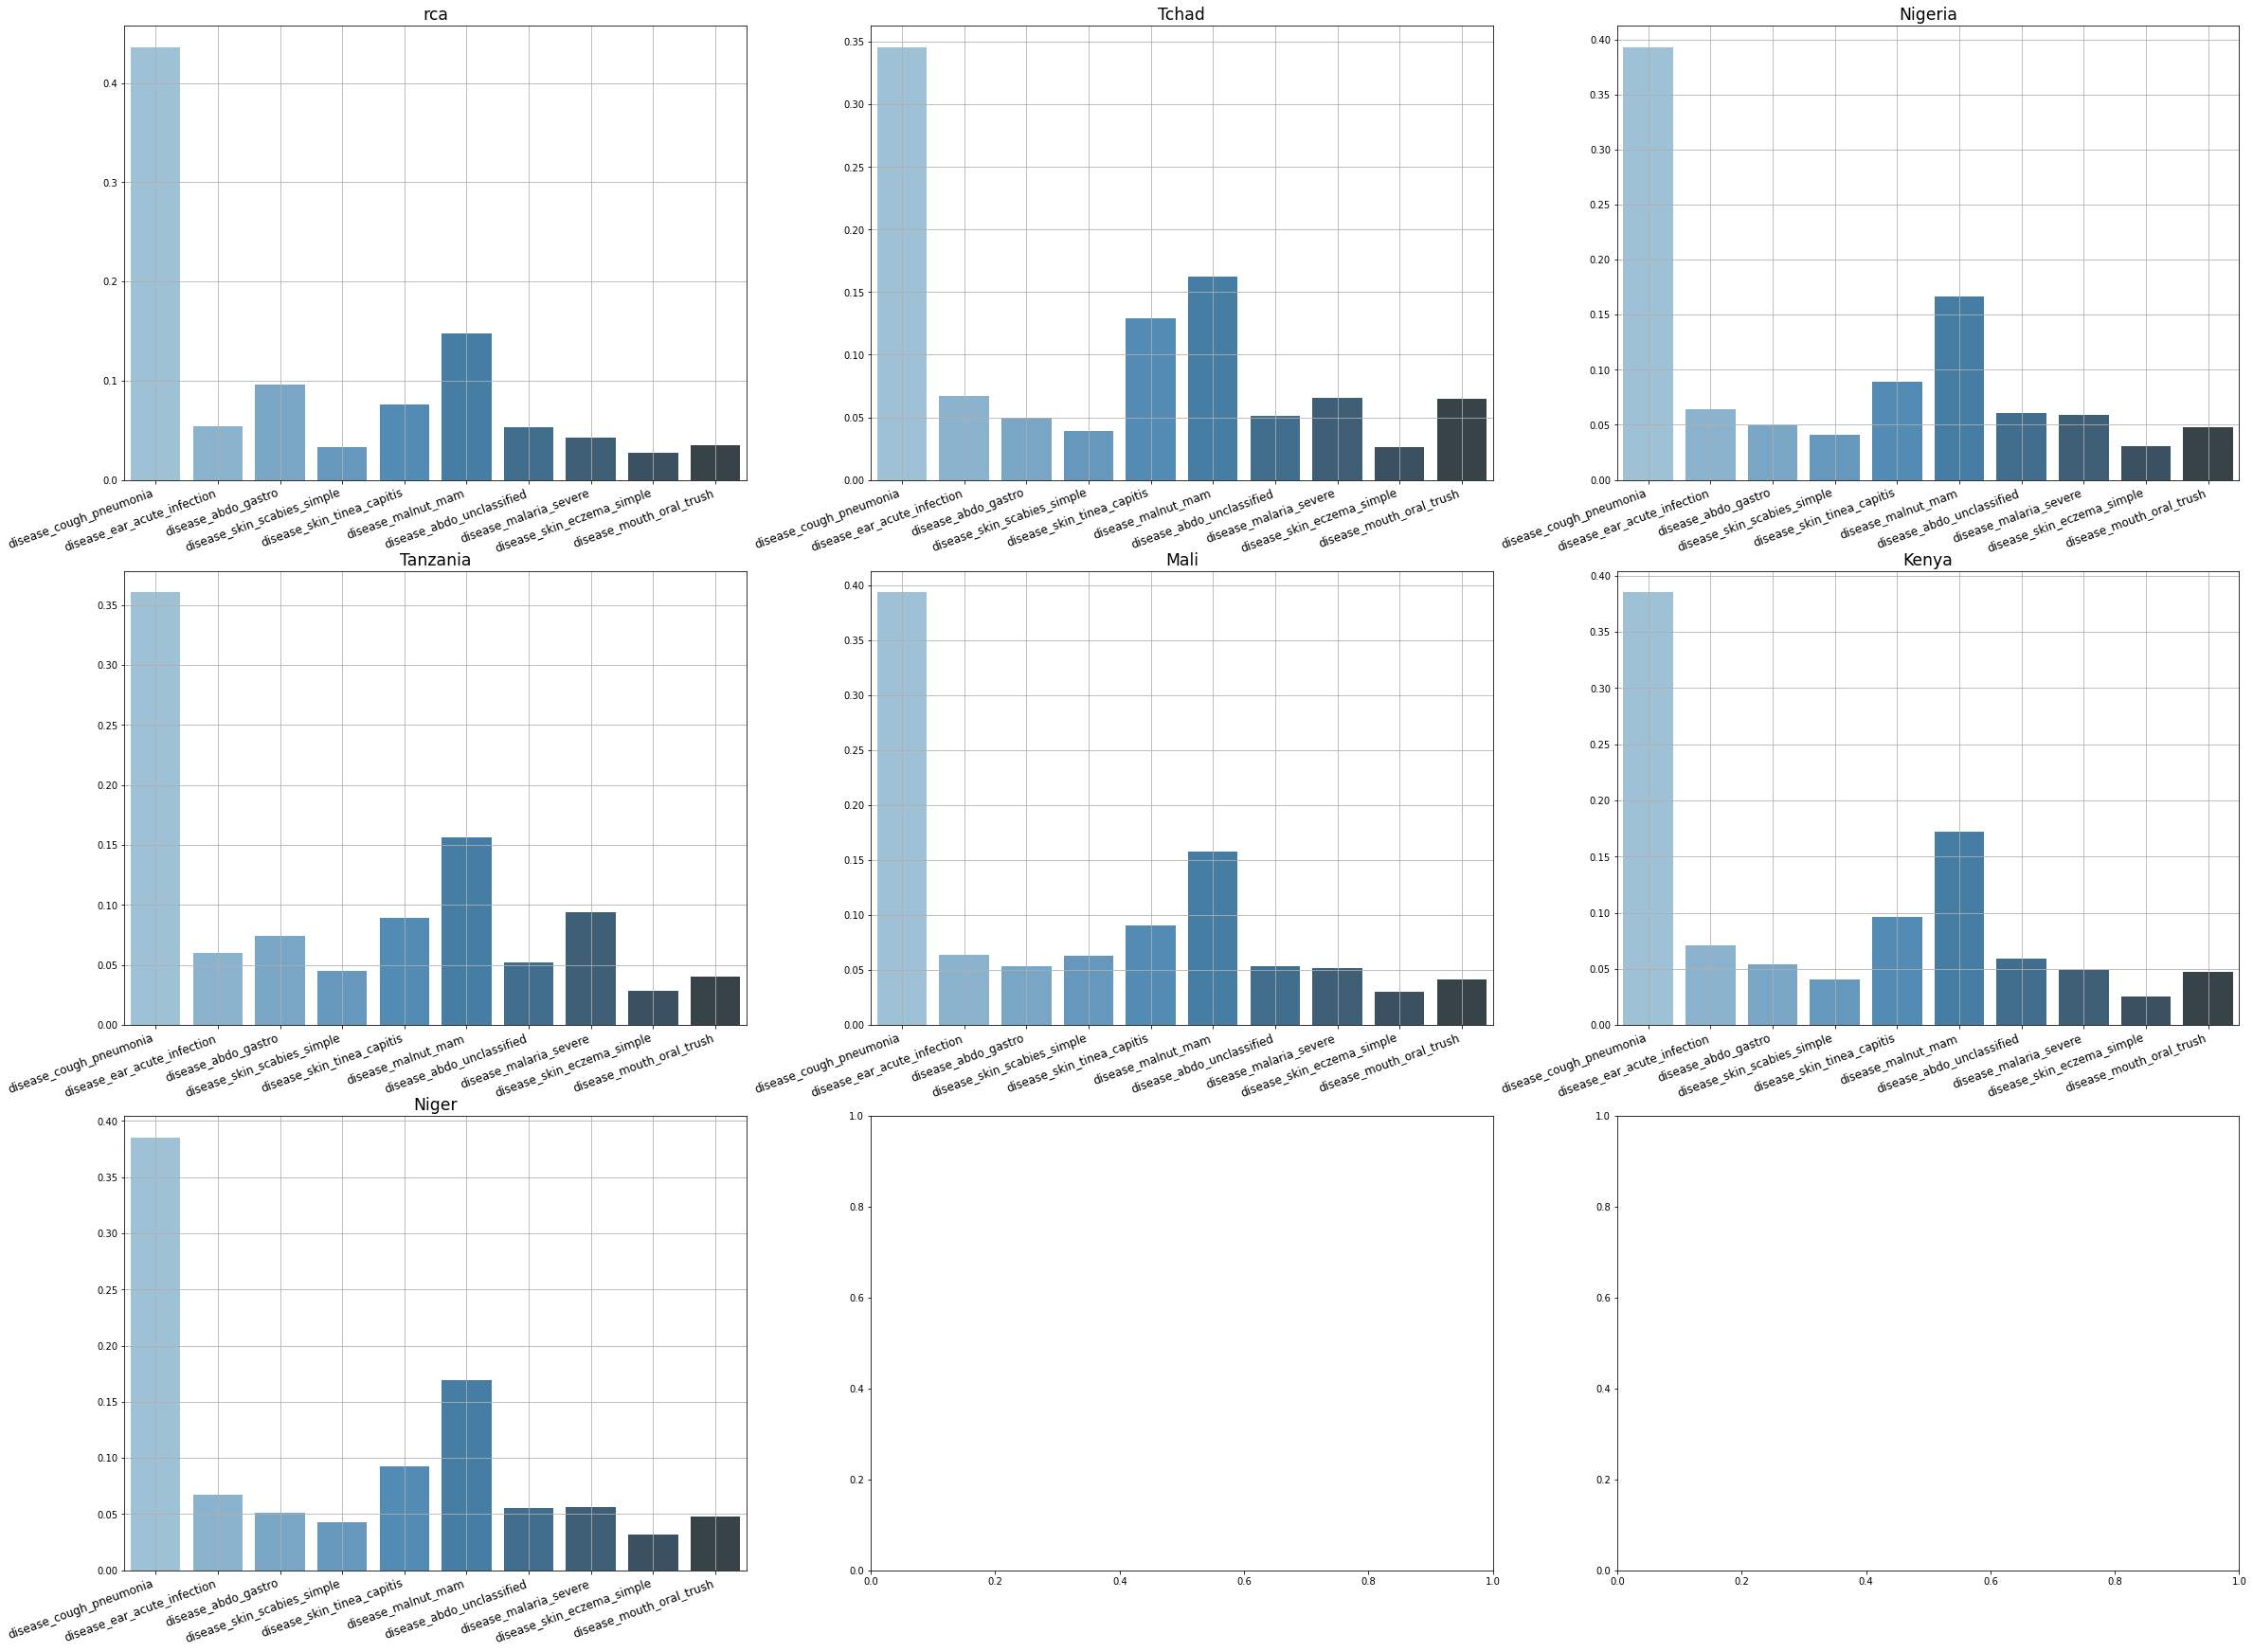

In [44]:
# diseases by country
countries = df_patient['base_country'].unique()
n_subplots = len(countries)
n_cols = 3
n_rows = int(np.ceil(n_subplots / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(40, 30))
i = j = 0
for k, country in enumerate(countries):
    _df = df_patient[df_patient['base_country'] == country]
    a = _df[diseases].sum()
#     axs[i][j].bar([x for x in range(len(a))], a, tick_label=symptoms)
    sns.barplot([x for x in range(len(a))], a/sum(a), ax=axs[i][j], palette="Blues_d")
#     plt.setp(axs[i][j].get_xticklabels(), rotation=-30, horizontalalignment='right')
    axs[i][j].set_xticklabels(diseases, rotation=20, ha="right", fontsize='large')
    axs[i][j].set_title(f"{country}", fontsize='xx-large')
    axs[i][j].grid()

    if k != 0 and (k + 1) % n_cols == 0:
        i += 1
    j = (j + 1) % (n_cols)
    
plt.savefig("figures/pdf_diseases_by_country.pdf")



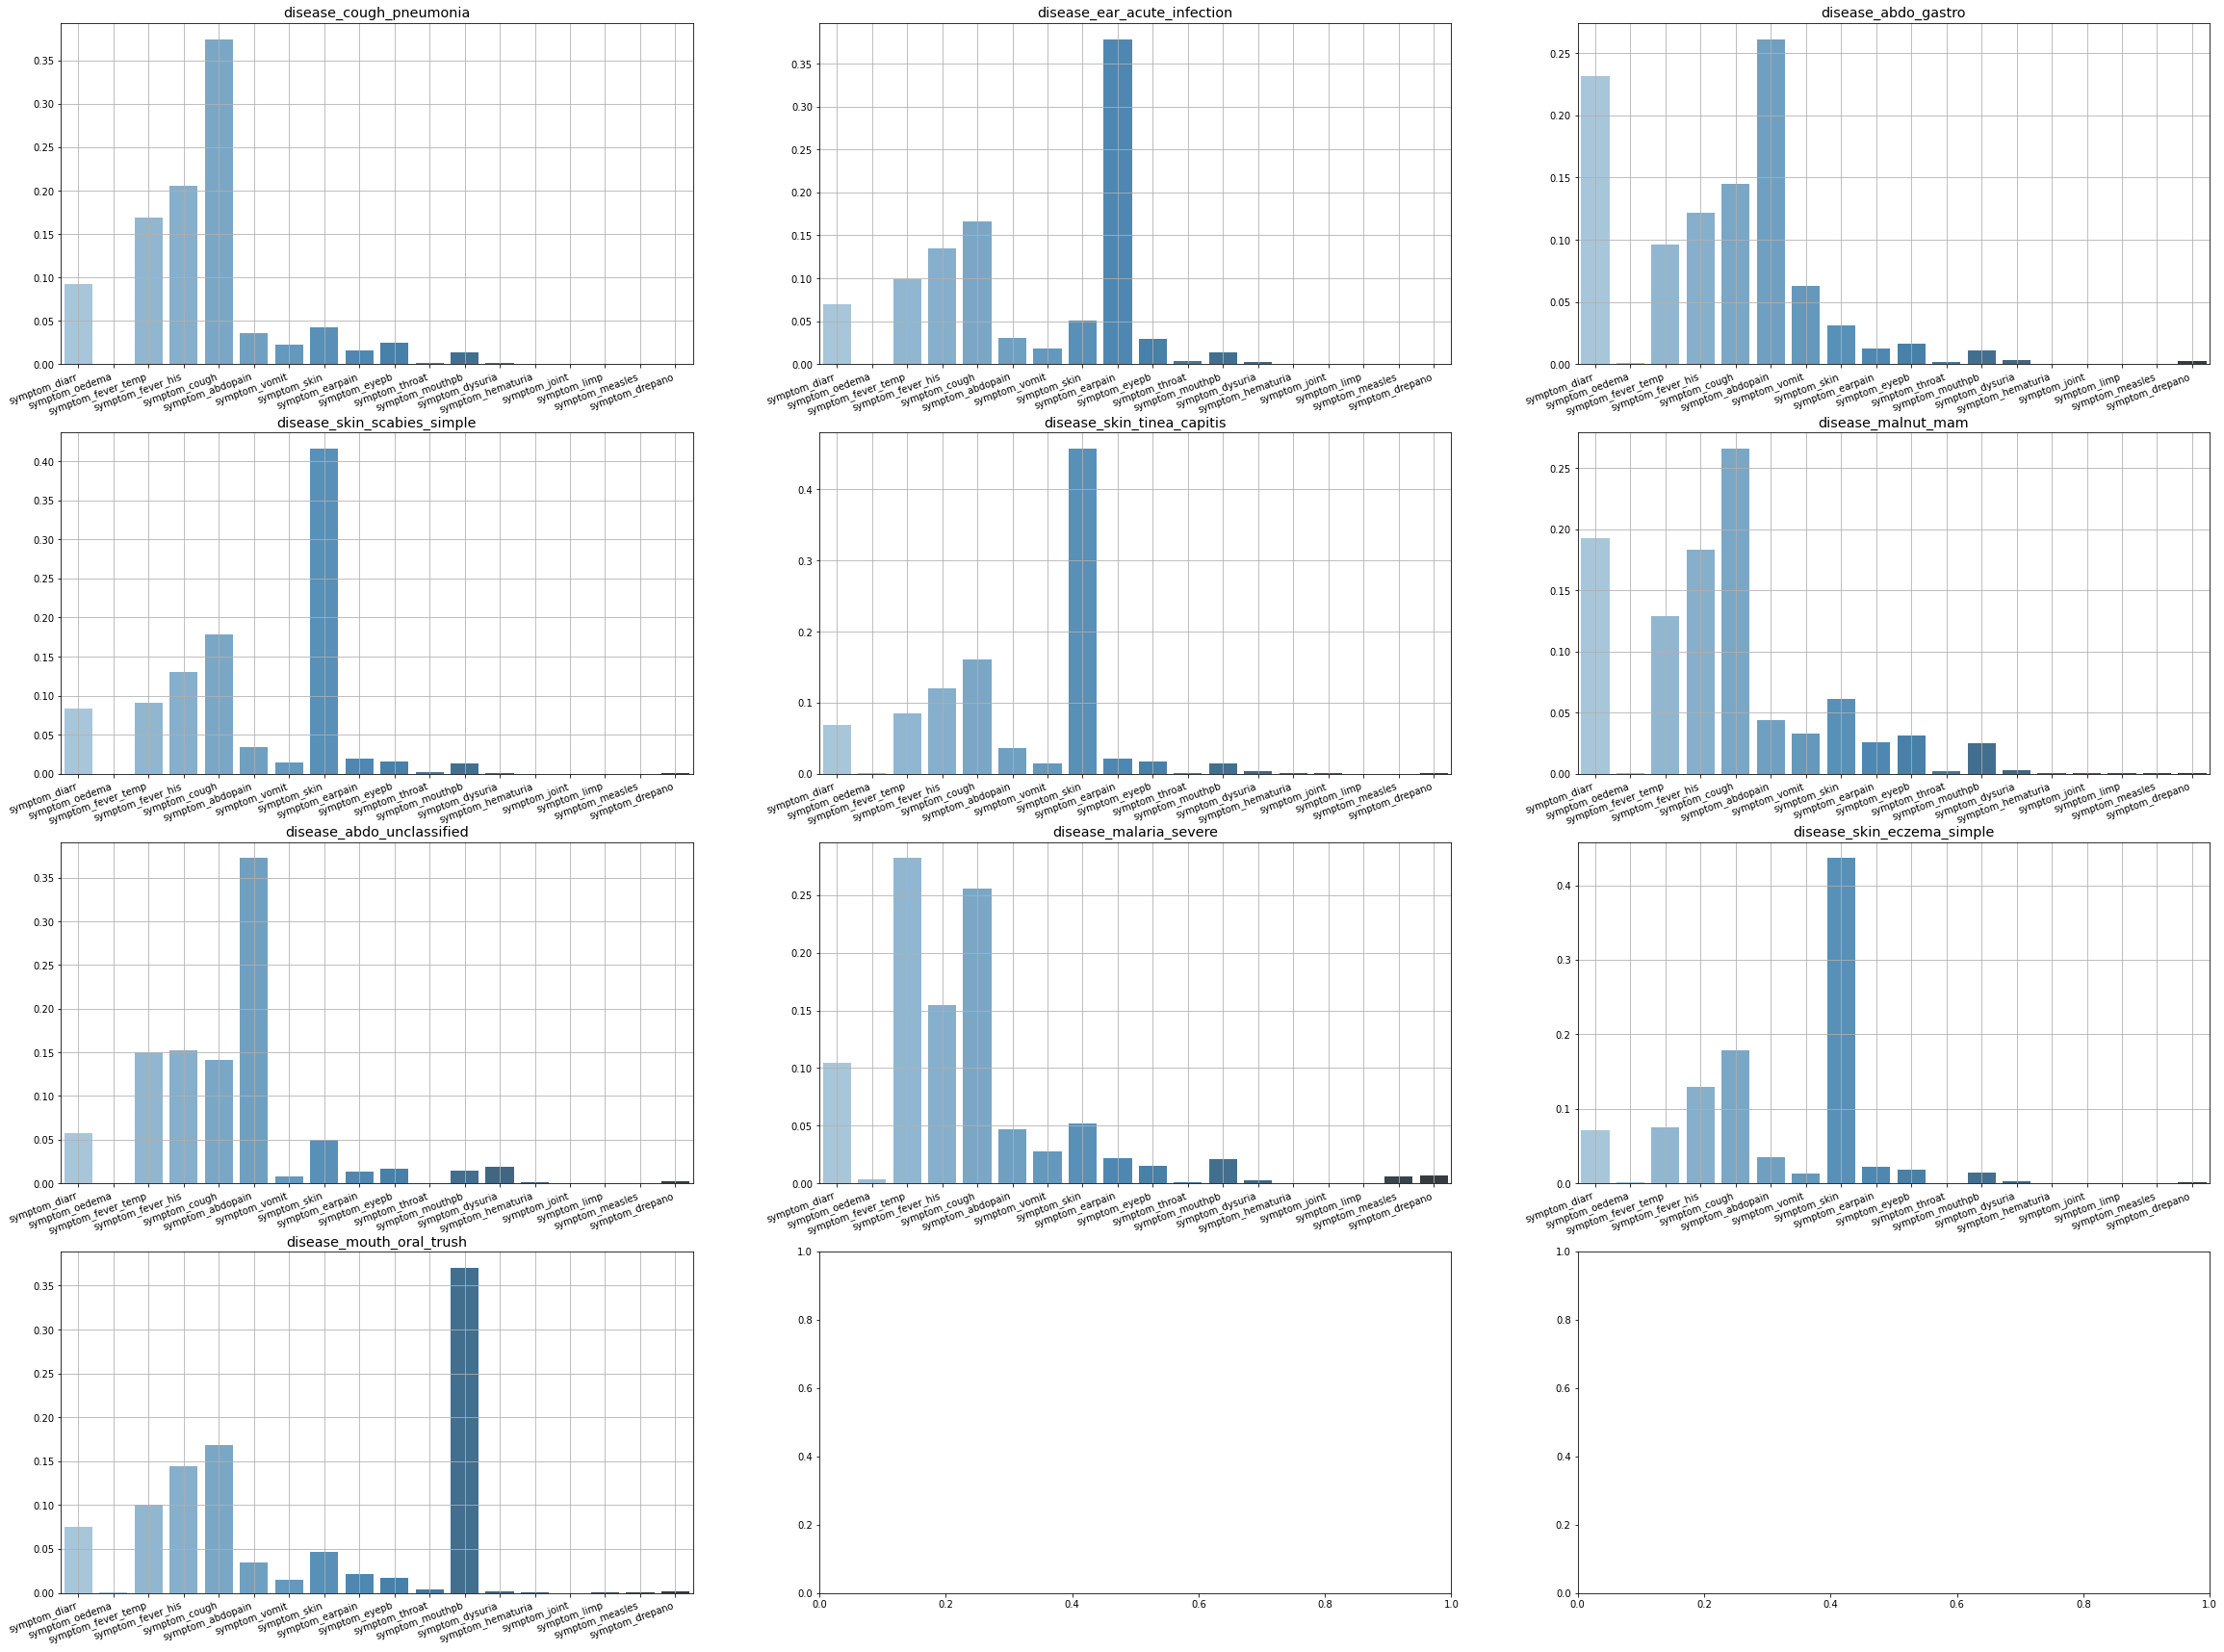

In [45]:
# symptom distribution per disease
n_subplots = len(diseases)
n_cols = 3
n_rows = int(np.ceil(n_subplots / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(40, 30))
i = j = 0
for k, disease in enumerate(diseases):
    _df = df_patient[df_patient[disease] == True]
    a = _df[symptoms].sum()
#     axs[i][j].bar([x for x in range(len(a))], a, tick_label=symptoms)
    sns.barplot([x for x in range(len(a))], a/sum(a), ax=axs[i][j], palette="Blues_d")
#     plt.setp(axs[i][j].get_xticklabels(), rotation=-30, horizontalalignment='right')
    axs[i][j].set_xticklabels(symptoms, rotation=20, ha="right")
    axs[i][j].set_title(f"{disease}", fontsize='x-large')
    axs[i][j].grid()

    if k != 0 and (k + 1) % n_cols == 0:
        i += 1
    j = (j + 1) % (n_cols)
    
plt.savefig("figures/pdf_symptoms_by_disease.pdf")

#     plt.suptitle(f"{disease}")
#     plt.savefig(f"figures/{disease}_hist.png", bbox_inches="tight")

## Plotting symptom frequencies for positive/ negative diseases

In [ ]:
for disease in diseases:
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    # plt.title("hello")
    titles = ["positive", "negative"]
    for i, df in enumerate(df_patient.groupby(f"{disease}")):
        a = df[1][symptoms].sum()
        axs[i].bar([x for x in range(len(a))], a, tick_label=symptoms)
        plt.setp(axs[i].get_xticklabels(), rotation=30, horizontalalignment='right')
        axs[i].set_title(f"{disease} {titles[i]}")
    #     plt.xticks(range(len(a)), symptoms)
    #     axs[i].xticks(range(len(a)), symptoms)
    #     axs[i].set_xticks([x for x in range(len(a))])
    #     axs[i].set_xlabels(symptoms)
    #     plt.hist(_df[1].sum())
    #     print(_df)

    plt.suptitle(f"{disease}")
#     plt.savefig(f"figures/{disease}_hist.png", bbox_inches="tight")

## Model V2

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("data/patient_data.csv")
df.head()

In [ ]:
sns.set(rc={'figure.figsize': (15, 10)})
sns.color_palette('pastel')

symptoms = [x for x in df.columns if 'symp' in x]
diagnoses = [x for x in df.columns if 'disease' in x]

# for season in df['season'].unique():
#     fig, axs = plt.subplots(1, 2, figsize=(15, 6))
#     for i, df_season in enumerate(df.groupby(f"{season}")):
# sns.histplot(data=df, x='disease_urti', hue='country', multiple='stack')

sns.barplot(x='season', y='symptom_cough', hue='age', data=df, palette='deep')

In [ ]:
df[df['season'] == 'spring']['symptom_cough'].mean()

## Model V3